In [1]:
import pandas as pd
import pathlib
from matplotlib import pyplot as plt
from collections import defaultdict
import re
import numpy as np
import matplotlib.transforms as transforms
import matplotlib as mpl
# mpl.rcParams['figure.dpi'] = 300
# mpl.rcParams['figure.figsize'] = [40, 20]

In [22]:
mpl.rcParams['figure.dpi'] = 300
plt.rcParams['axes.axisbelow'] = True

In [23]:
lthmp_path = pathlib.Path('../../experiments/LTHMP2020_results')

In [24]:
sorted_results = defaultdict(list)

for run_collection in lthmp_path.glob('*'):
    for res in run_collection.glob('*'):

        path_str = str(res)
        pkl_dir = res/'metrics.pkl'
        if not pkl_dir.exists():
            print('{} does not have metrics pkl!'.format(res))
            continue
        if '-seed-9' in path_str:
            continue

        metric_pkl = pd.read_pickle(str(pkl_dir.resolve()))

        if '-irl-0' in path_str:
            sorted_results['no_irl'].append(metric_pkl)
        if 'irl-1500' in path_str:
            if 'preirl-100' in path_str:
                sorted_results['pre-irl-1500'].append(metric_pkl)
            elif 'preirl-0' in path_str:
                sorted_results['irl-1500'].append(metric_pkl)
        if 'irl-5000' in path_str:
            if 'preirl-100' in path_str:
                sorted_results['pre-irl-2500'].append(metric_pkl)
            elif 'preirl-0' in path_str:
                sorted_results['irl-2500'].append(metric_pkl)


In [25]:
sorted_results.keys()

dict_keys(['pre-irl-1500', 'irl-1500', 'no_irl', 'pre-irl-2500', 'irl-2500'])

In [26]:
for key,val in sorted_results.items():
    print(key, len(val))

pre-irl-1500 9
irl-1500 9
no_irl 18
pre-irl-2500 9
irl-2500 9


pre-irl-1500 mean 48.333333333333336 13.432961119739923
irl-1500 mean 38.888888888888886 8.047697316547474
no_irl mean 12.555555555555555 9.719523434946238
pre-irl-2500 mean 49.55555555555556 8.958064164776166
irl-2500 mean 59.666666666666664 23.065125189341593


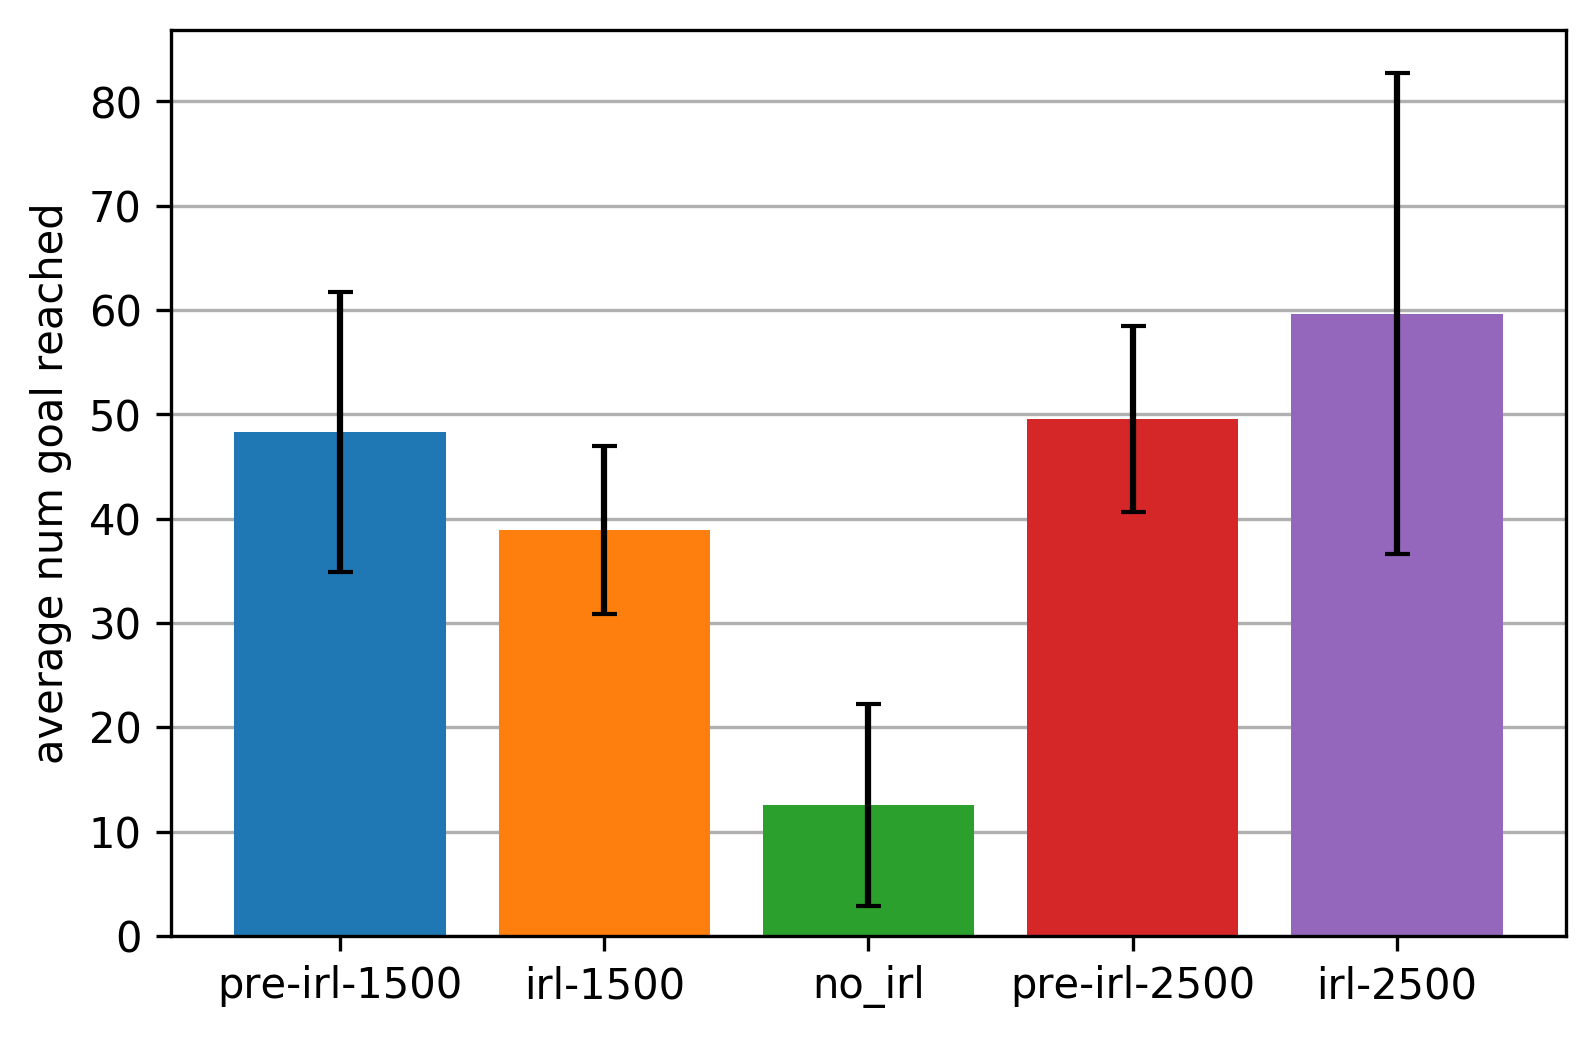

In [40]:
for key,val in sorted_results.items():
    goals_reached = [tab['goal_reached'].sum() for tab in val]
    print(key, 'mean', np.mean(goals_reached), np.std(goals_reached))
    
    plt.bar(key, np.mean(goals_reached), yerr=np.std(goals_reached), capsize=3)
    plt.ylabel('average num goal reached')
    
plt.grid(axis='y')

pre-irl-1500 mean 48.333333333333336 13.432961119739923
irl-1500 mean 38.888888888888886 8.047697316547474
no_irl mean 12.555555555555555 9.719523434946238
pre-irl-2500 mean 49.55555555555556 8.958064164776166
irl-2500 mean 59.666666666666664 23.065125189341593


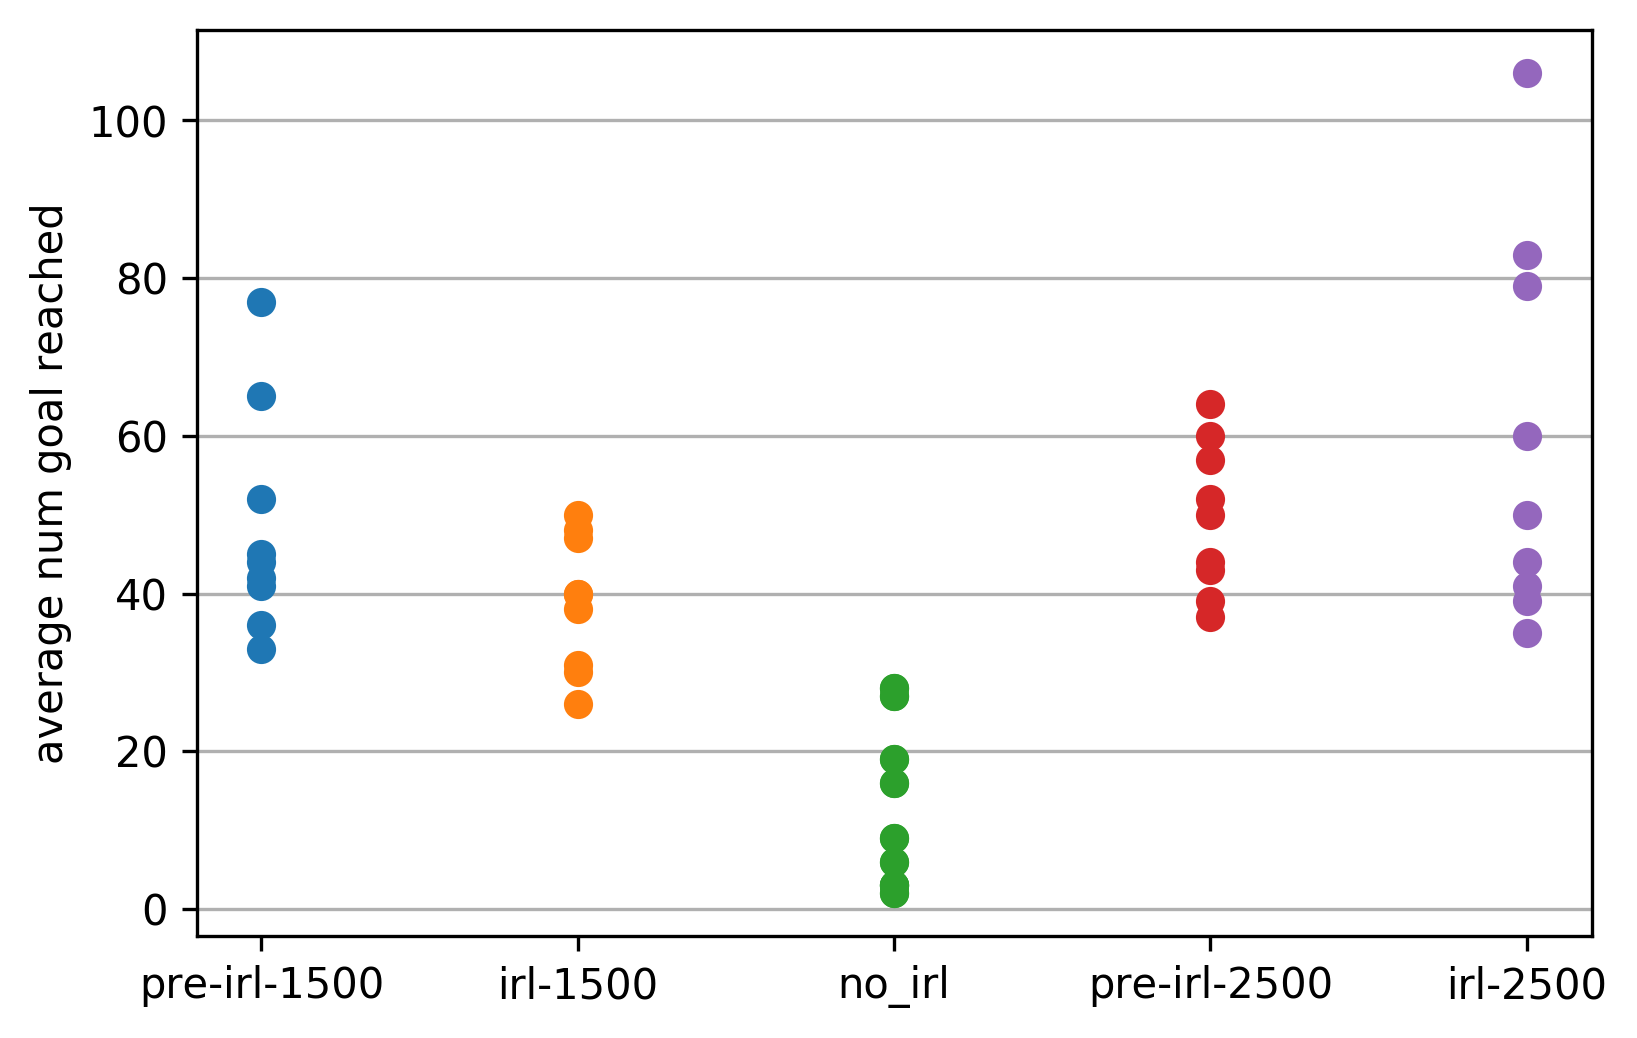

In [32]:
for key,val in sorted_results.items():
    goals_reached = [tab['goal_reached'].sum() for tab in val]
    print(key, 'mean', np.mean(goals_reached), np.std(goals_reached))
    
    plt.scatter([key]*len(goals_reached), goals_reached)
    plt.ylabel('average num goal reached')
    
plt.grid(axis='y')

In [29]:
for key,val in sorted_results.items():
    print(val[0])

    compute_trajectory_smoothness  compute_distance_displacement_ratio  \
146  (1250.0, 2.4950099800399204)                             0.927627   
147   (600.0, 4.3478260869565215)                             0.978136   
148   (540.0, 1.0778443113772456)                             0.988628   
149   (400.0, 1.0695187165775402)                             0.983587   
150  (1410.0, 4.2342342342342345)                             0.957756   
..                            ...                                  ...   
141   (1160.0, 2.315369261477046)                             0.969655   
142  (5680.0, 11.337325349301397)                             0.840015   
143   (1600.0, 3.193612774451098)                             0.935417   
144  (2980.0, 22.575757575757574)                             0.917300   
145   (3810.0, 7.604790419161676)                             0.596442   

    proxemic_intrusions anisotropic_intrusions  count_collisions  \
146           (0, 0, 0)          (36, 120, 

pre-irl-1500 mean 218.39376852997006 44.8528572997424
irl-1500 mean 203.98883529079933 28.726769789256906
no_irl mean 150.05195437719567 103.72162139618075
pre-irl-2500 mean 244.794081372533 56.82653428316152
irl-2500 mean 282.45845007189627 68.29004092146334


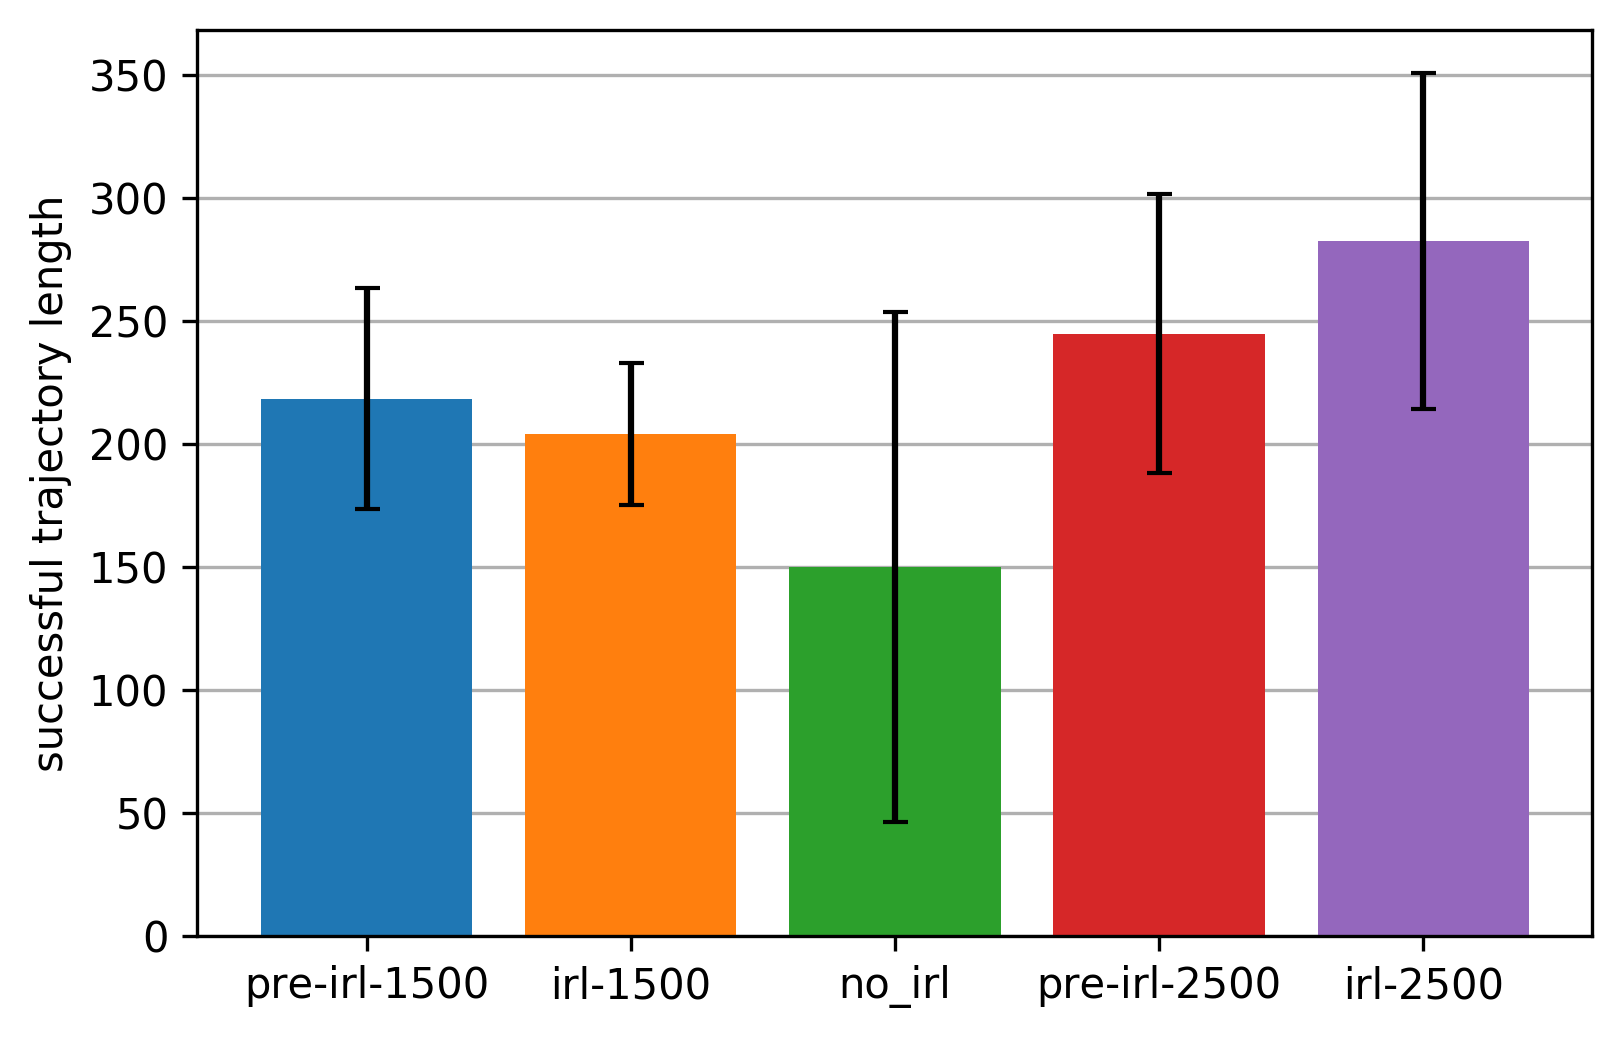

In [39]:
for key,val in sorted_results.items():
    traj_length = []
    for tab in val:
        success_tab = tab[tab['goal_reached'] == True]
        traj_length.append(success_tab['trajectory_length'].mean())
        
    print(key, 'mean', np.mean(traj_length), np.std(traj_length))
    plt.bar(key, np.mean(traj_length), yerr=np.std(traj_length), capsize=3)
    plt.ylabel('successful trajectory length')
    
plt.grid(axis='y')

In [11]:
for key,val in sorted_results.items():
    goals_reached = [tab['count_collisions'].sum() for tab in val]
    print(key, 'mean', np.mean(goals_reached), np.std(goals_reached))

pre-irl-1500 mean 1479.4444444444443 79.77065892100528
irl-1500 mean 1563.111111111111 24.433330806932315
no_irl mean 1083.2222222222222 85.68647991081308
pre-irl-2500 mean 1720.6666666666667 107.88986153583765
irl-2500 mean 1725.888888888889 147.46181761500495


In [12]:
for key,val in sorted_results.items():
    smooth = []
    for tab in val:
        for tup in tab['compute_trajectory_smoothness']:
            smooth.append(tup[1])
            
    print(key, 'mean', np.mean(smooth), np.std(smooth))

pre-irl-1500 mean 11.75070767424743 14.317994900551549
irl-1500 mean 16.959608130284142 19.28483816243946
no_irl mean 33.235760117766525 30.178903028897235
pre-irl-2500 mean 10.417979263798935 12.07639128608806
irl-2500 mean 12.556744460307145 14.041934025274992


In [13]:
for key,val in sorted_results.items():
    ddr = [tab['compute_distance_displacement_ratio'].mean() for tab in val]
    print(key, 'mean', np.mean(goals_reached), np.std(goals_reached))

pre-irl-1500 mean 1725.888888888889 147.46181761500495
irl-1500 mean 1725.888888888889 147.46181761500495
no_irl mean 1725.888888888889 147.46181761500495
pre-irl-2500 mean 1725.888888888889 147.46181761500495
irl-2500 mean 1725.888888888889 147.46181761500495


pre-irl-1500 mean int 0.2222222222222222 0.41573970964154905
pre-irl-1500 mean pers 3.7777777777777777 1.227262335243029
pre-irl-1500 mean social  286.44444444444446 30.067003365118126
irl-1500 mean int 0.3333333333333333 0.4714045207910317
irl-1500 mean pers 3.3333333333333335 1.4142135623730951
irl-1500 mean social  304.44444444444446 36.839324131546384
no_irl mean int 0.3333333333333333 0.6666666666666666
no_irl mean pers 3.3333333333333335 1.247219128924647
no_irl mean social  391.0 15.121728296285006
pre-irl-2500 mean int 0.2222222222222222 0.41573970964154905
pre-irl-2500 mean pers 3.2222222222222223 0.7856742013183862
pre-irl-2500 mean social  322.6666666666667 30.206695357891178
irl-2500 mean int 0.0 0.0
irl-2500 mean pers 4.0 1.632993161855452
irl-2500 mean social  324.1111111111111 38.23158799981573


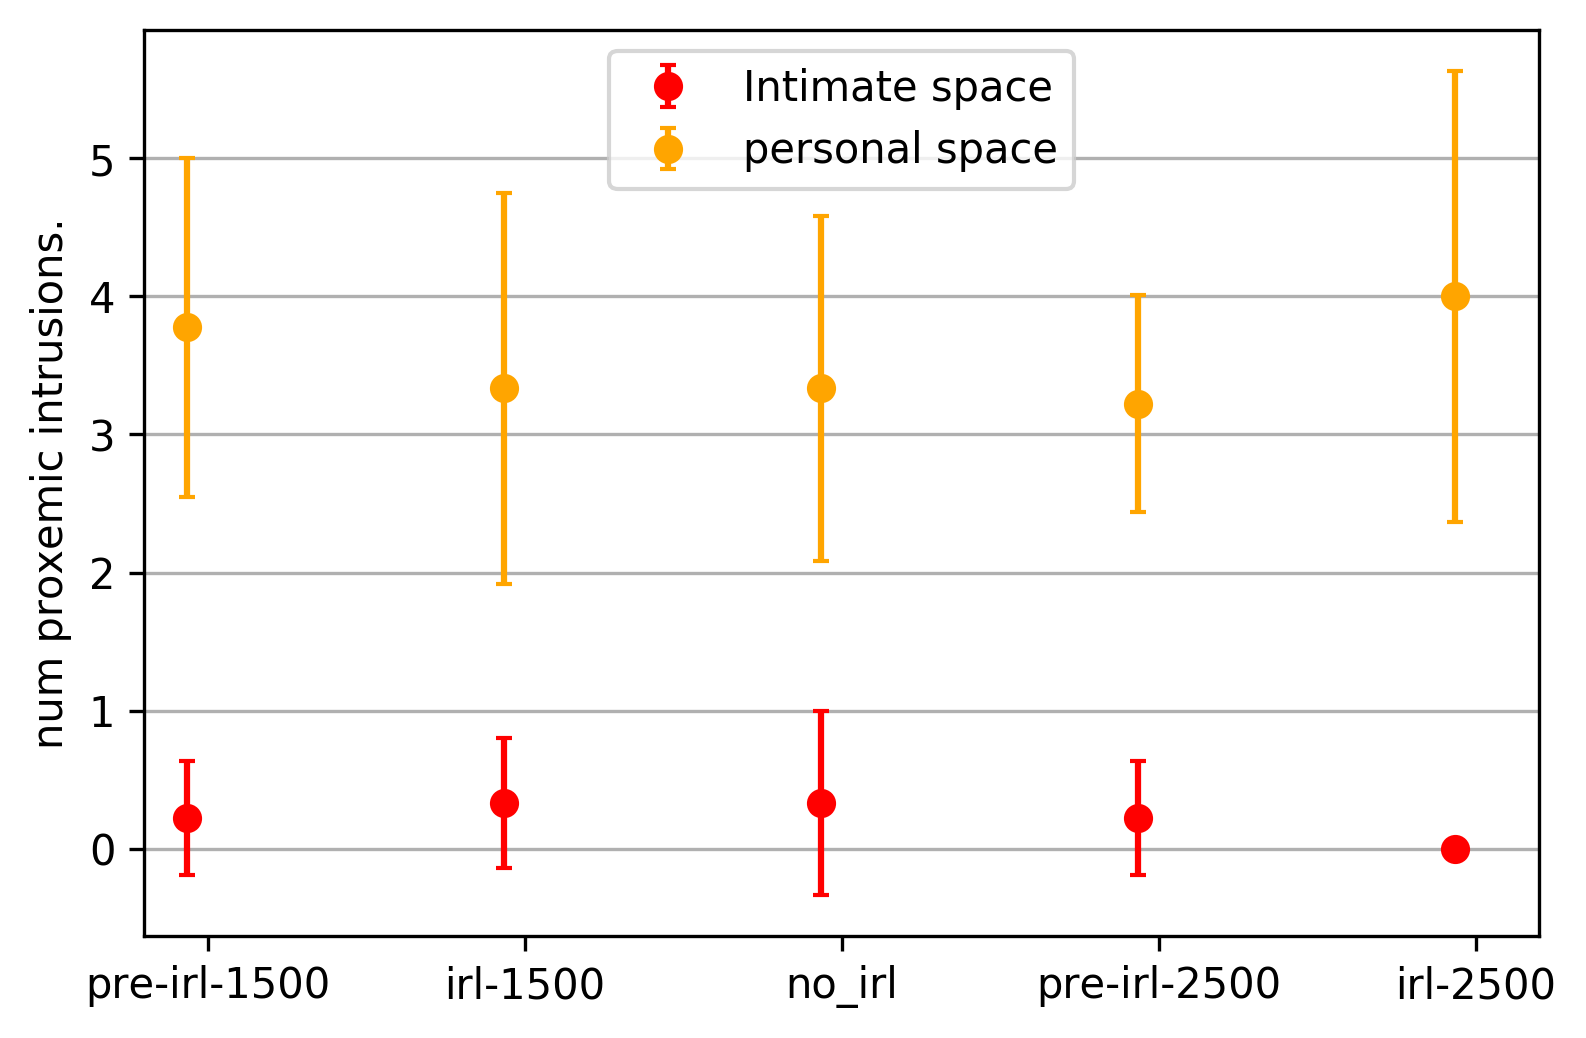

In [37]:
for key,val in sorted_results.items():
    int_totals = []
    pers_totals = []
    social_totals = []
    
    for tab in val:
        intimate = []
        personal = []
        social = []
        
        for tup in tab['proxemic_intrusions']:
            intimate.append(tup[0])
            personal.append(tup[1])
            social.append(tup[2])
        
        int_sum = sum(intimate)
        pers_sum = sum(personal)
        social_sum = sum(social)
        
        int_totals.append(int_sum)
        pers_totals.append(pers_sum)
        social_totals.append(social_sum)
            
    print(key, 'mean int', np.mean(int_totals), np.std(int_totals))
    print(key, 'mean pers', np.mean(pers_totals), np.std(pers_totals))
    print(key, 'mean social ', np.mean(social_totals), np.std(social_totals))
    
    
    offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
    trans = plt.gca().transData
    
    plt.errorbar([key], np.mean(int_totals), yerr=np.std(int_totals) , fmt='o', transform=trans+offset(-5), color='red', capsize=2)
    plt.errorbar([key], np.mean(pers_totals) , yerr=np.std(pers_totals), fmt='o', transform=trans+offset(-5), color='orange', capsize=2)
#     plt.errorbar([key], np.mean(social_totals) , yerr=np.std(social_totals), fmt='o', transform=trans+offset(-5), color='blue')
    plt.ylabel('num proxemic intrusions.')

plt.legend(['Intimate space', 'personal space'], loc=9)
plt.grid(axis='y')

pre-irl-1500 mean int 30918.555555555555 3274.2467873835285
pre-irl-1500 mean pers 41939.333333333336 4948.179934750419
pre-irl-1500 mean social  9500.111111111111 1406.2628523418168
irl-1500 mean int 32540.88888888889 971.9296321630198
irl-1500 mean pers 45270.666666666664 3082.0697951575044
irl-1500 mean social  9445.888888888889 1165.430911670247
no_irl mean int 6883.222222222223 1226.3804718472954
no_irl mean pers 13998.111111111111 1710.7178119429182
no_irl mean social  8113.0 947.3857597503658
pre-irl-2500 mean int 37619.88888888889 4143.4708865460025
pre-irl-2500 mean pers 48958.77777777778 2782.0776320256205
pre-irl-2500 mean social  10269.777777777777 1557.0167898743473
irl-2500 mean int 33992.0 5437.836783950846
irl-2500 mean pers 49521.77777777778 6446.334406773404
irl-2500 mean social  11948.777777777777 2008.0276546224145


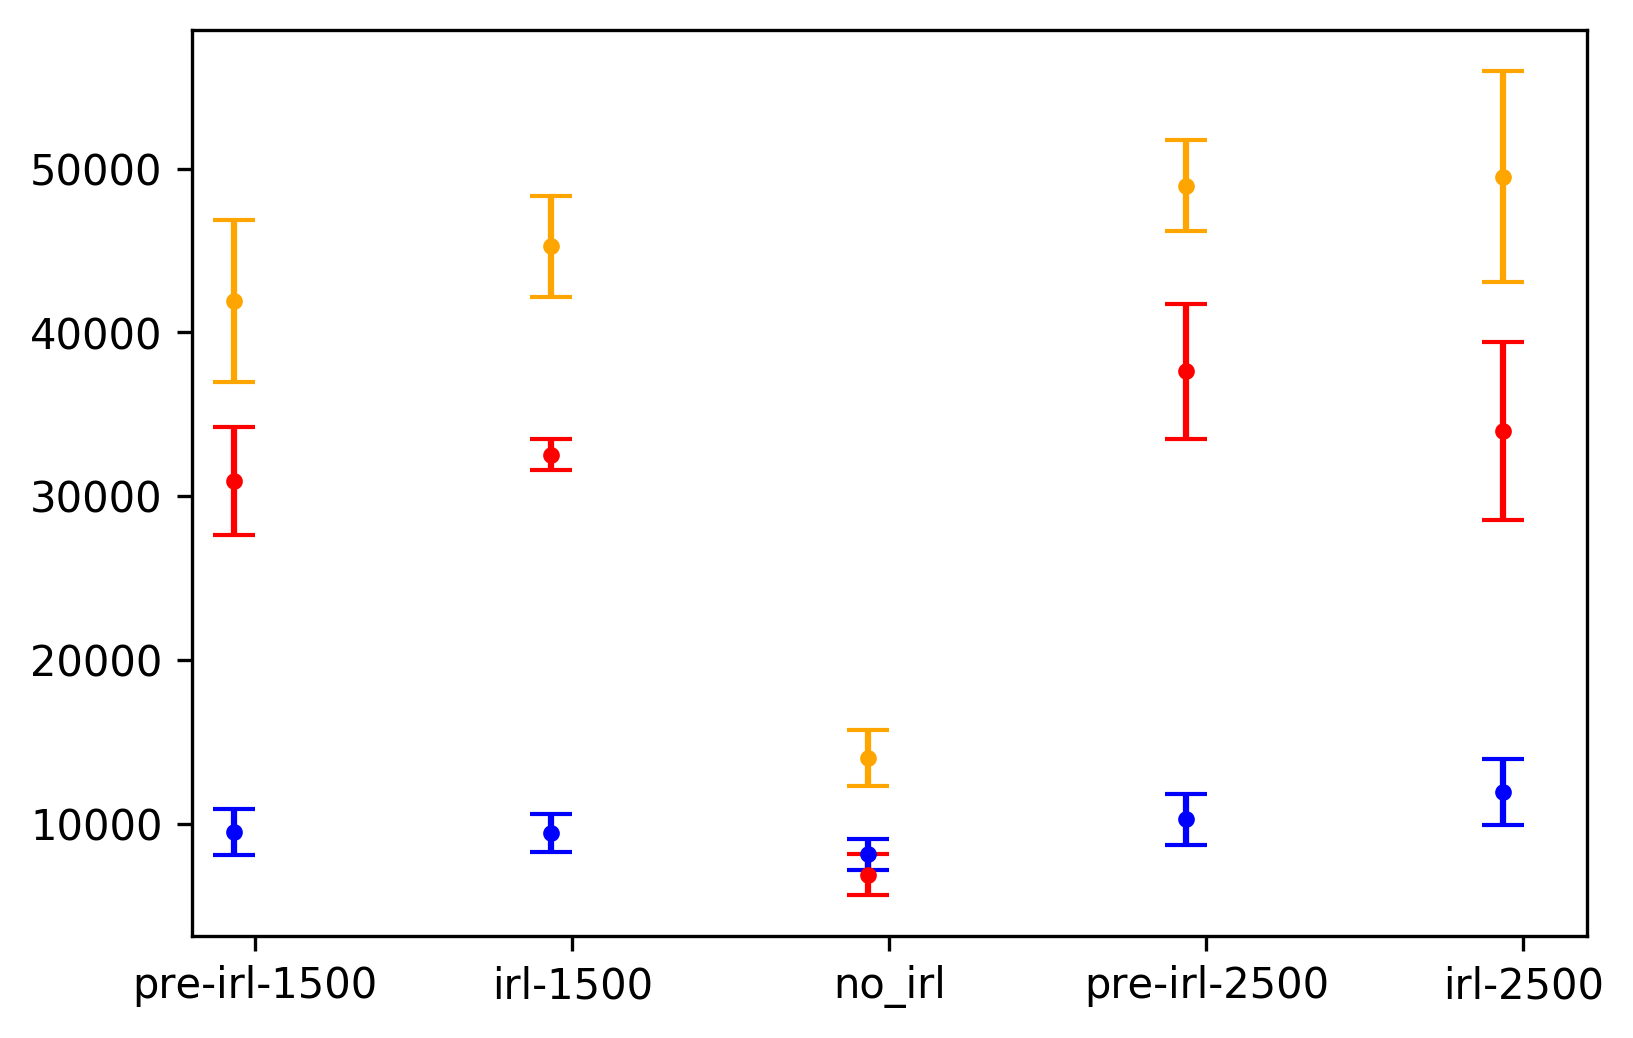

In [15]:
for key,val in sorted_results.items():
    int_totals = []
    pers_totals = []
    social_totals = []
    
    for tab in val:
        intimate = []
        personal = []
        social = []
        
        for tup in tab['anisotropic_intrusions']:
            intimate.append(tup[0])
            personal.append(tup[1])
            social.append(tup[2])
        
        int_sum = sum(intimate)
        pers_sum = sum(personal)
        social_sum = sum(social)
        
        int_totals.append(int_sum)
        pers_totals.append(pers_sum)
        social_totals.append(social_sum)
            
    print(key, 'mean int', np.mean(int_totals), np.std(int_totals))
    print(key, 'mean pers', np.mean(pers_totals), np.std(pers_totals))
    print(key, 'mean social ', np.mean(social_totals), np.std(social_totals))
    
    
    offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
    trans = plt.gca().transData
    
    plt.errorbar([key], np.mean(int_totals), yerr=np.std(int_totals) , fmt='.', transform=trans+offset(-5), color='red', capsize=5)
    plt.errorbar([key], np.mean(pers_totals) , yerr=np.std(pers_totals), fmt='.', transform=trans+offset(-5), color='orange', capsize=5)
    plt.errorbar([key], np.mean(social_totals) , yerr=np.std(social_totals), fmt='.', transform=trans+offset(-5), color='blue', capsize=5)
    